In [145]:
import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib.pyplot as plt
import plotly as pt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as w
from IPython.display import display

## Importing Dataset

In [146]:
df= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

In [147]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [148]:
df.shape

(550068, 10)

In [149]:
for i in df.columns:
  print(i,':',df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [150]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [151]:
df.isnull().sum()
# No Null values found 

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### Checking Value Counts for Categorical Columns

In [152]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [153]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [154]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [155]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [156]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [157]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [158]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

## Corelating Plot in Heatmap

In [159]:
df_copy = df.copy().corr()

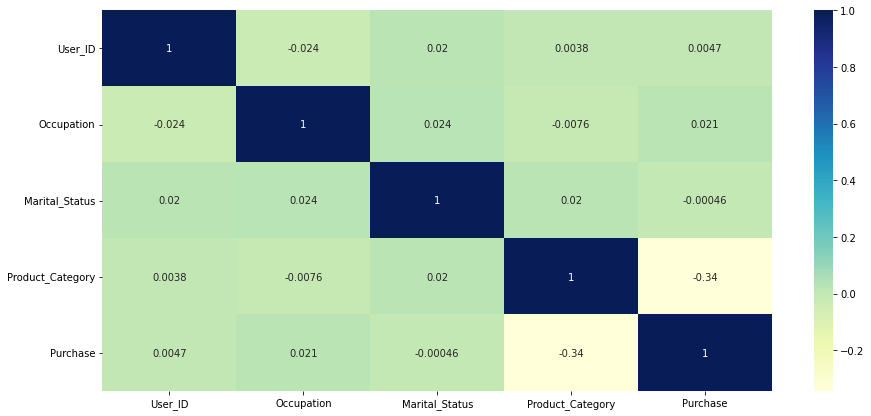

In [160]:
# Correlation plot as Heatmap

plt.figure(figsize=(15,7))
sns.heatmap(df_copy, cmap="YlGnBu" , annot=True)
plt.show()

Correlation: 
1. We can see clear correlation between Product_Category and Marital_status
2. And Also Purchase and occupation also has high correlation

## Observing Outliers of Occupation

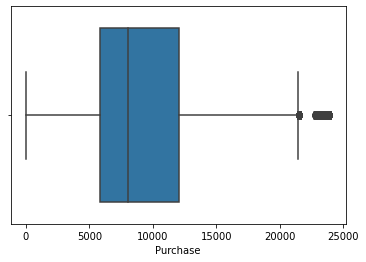

In [161]:
ax= sns.boxplot(data=df, x="Purchase", orient='h')
plt.show()

In [162]:
# There are outliers present , and hence , we can delete the rows having purchase greater than 20000
df = df[df["Purchase"]<20000]

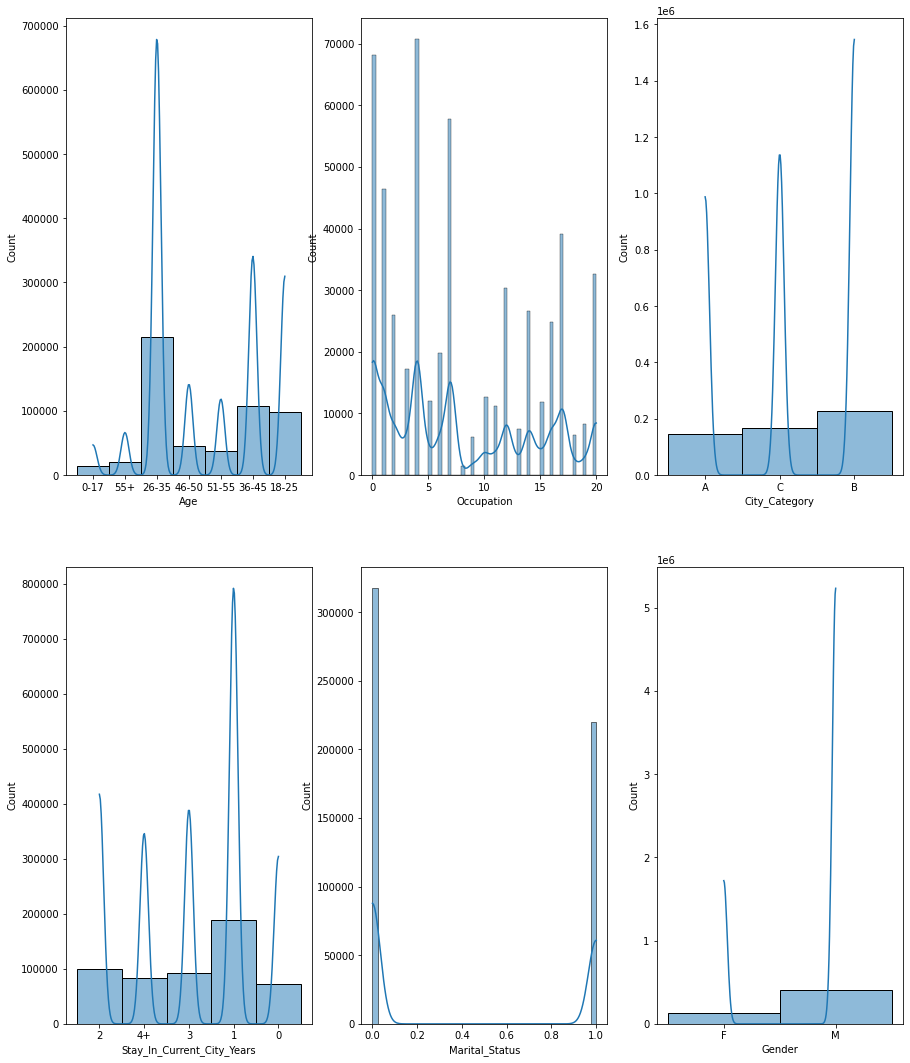

In [163]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15, 13))
fig.subplots_adjust(top=1.2)  
sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Occupation", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="City_Category", kde=True, ax=axis[0,2])
sns.histplot(data=df, x="Stay_In_Current_City_Years", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Marital_Status", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Gender", kde=True, ax=axis[1,2])

Observations:


* 26-35 age category has done more number of purchases and least is 0-17
* 4th occupation category has done more purchases and least is 9
* City category B has done more purchases and least by A city category
* More number of purchases done by 1 year stay in current city
* Single person purchased more than married
* We can clearly see More male person purchased than female

## Distplot for Analysis of Continuous Variable

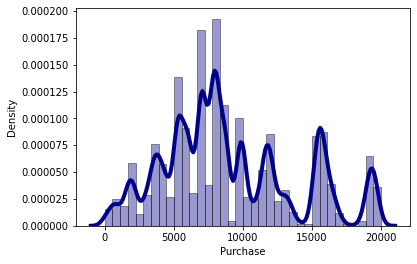

In [207]:
# Distplot for purchase

sns.distplot(df['Purchase'], hist=True, kde= True,
            bins =int(36), color ='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})
plt.show()

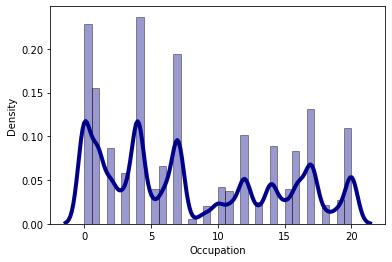

In [205]:
#Distplot for Occupation
sns.distplot(df['Occupation'], hist=True, kde= True,
            bins =int(36), color ='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})
plt.show()

In [166]:
# Finding the purchase power of wallmart customers 
df['Purchase'].describe()

count    537371.000000
mean       8984.494781
std        4733.938413
min          12.000000
25%        5466.000000
50%        8003.000000
75%       11879.000000
max       19999.000000
Name: Purchase, dtype: float64

In [167]:
# Finding the no of city categroy
df['City_Category'].nunique()

3

In [168]:
# Also finding the unique Product category
df['Product_Category'].nunique()

20

## Crosstabs

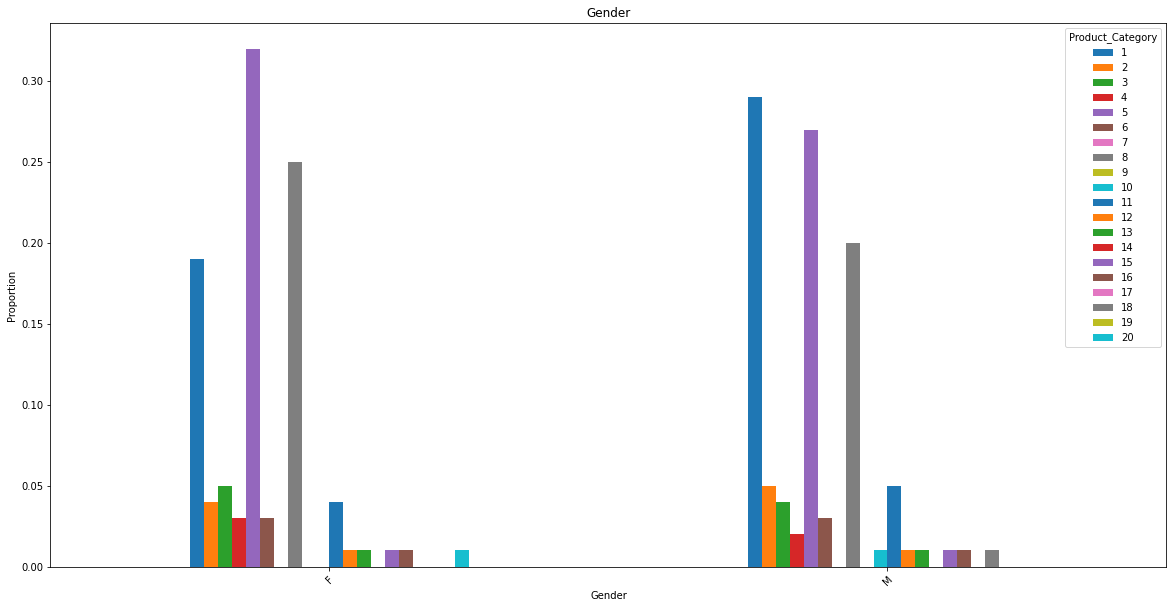

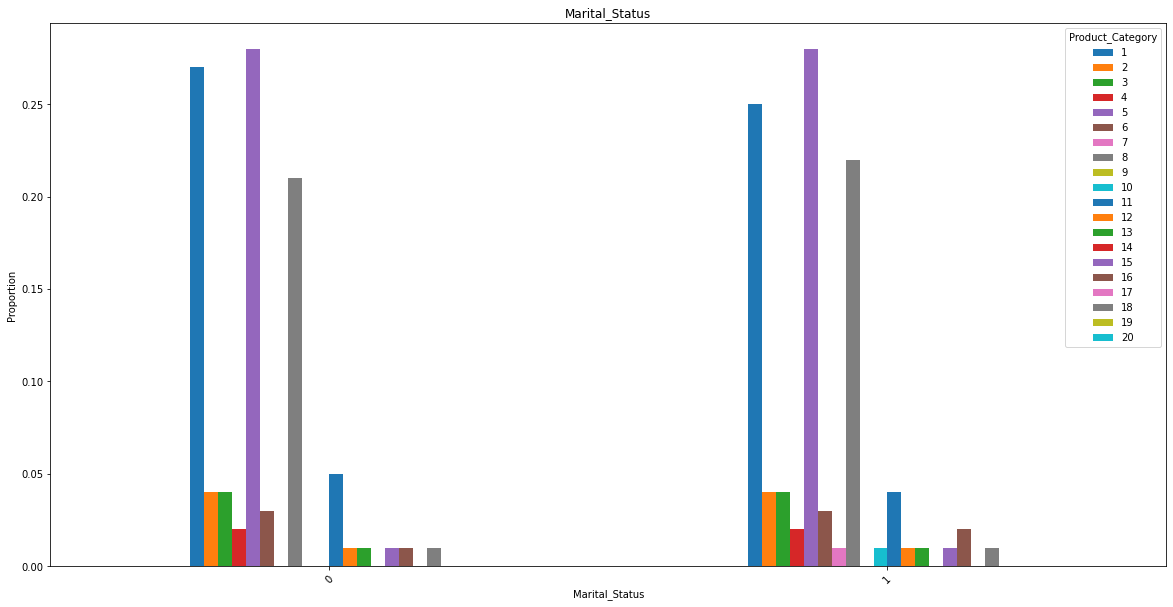

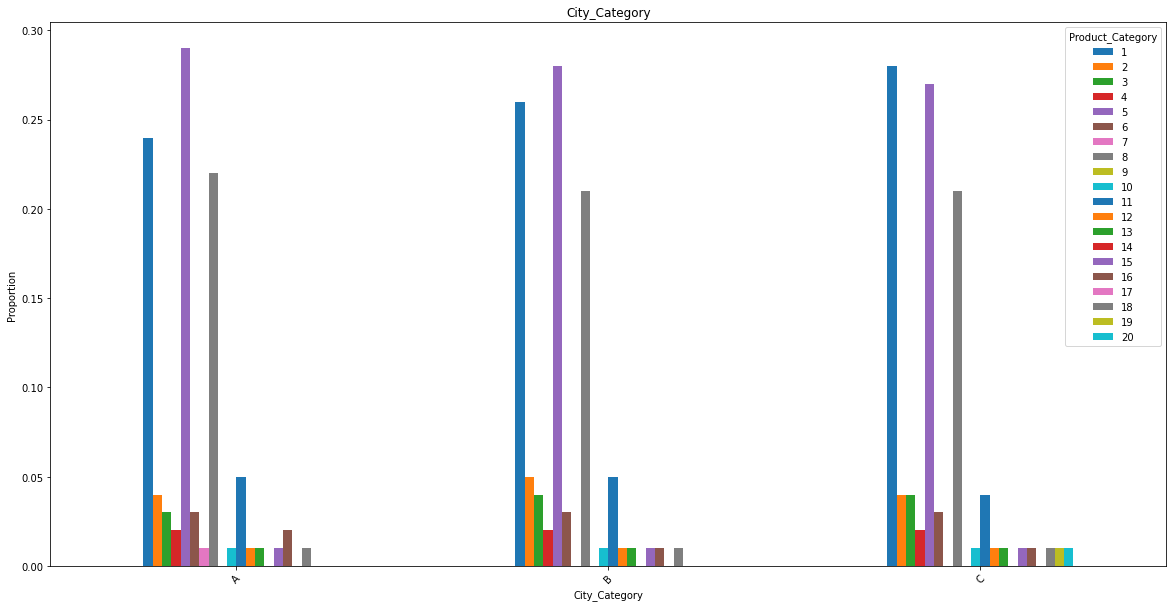

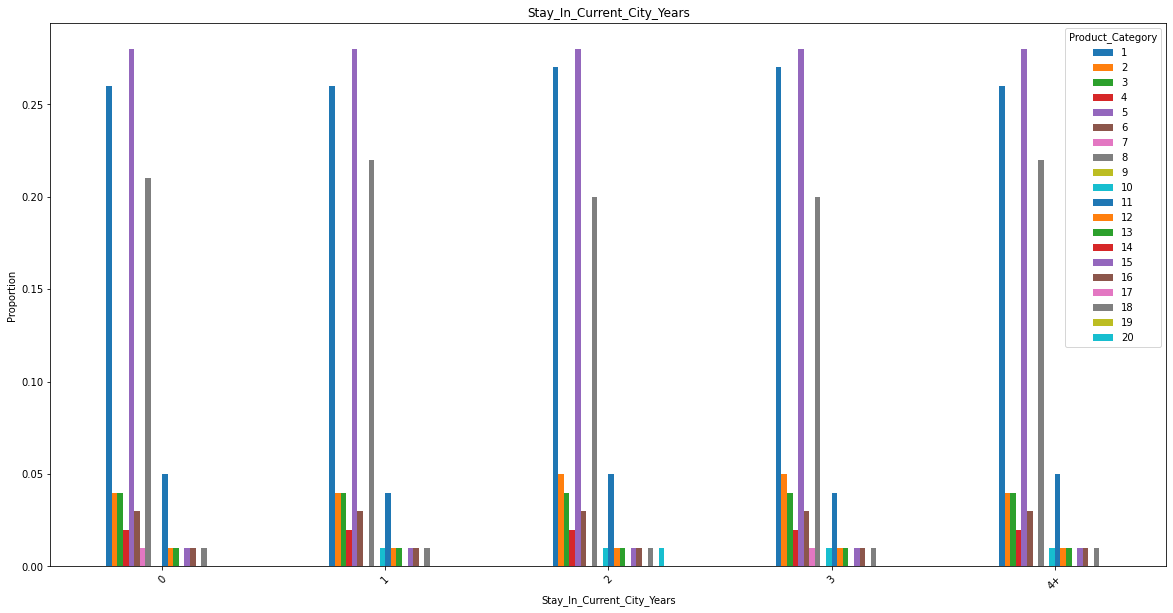

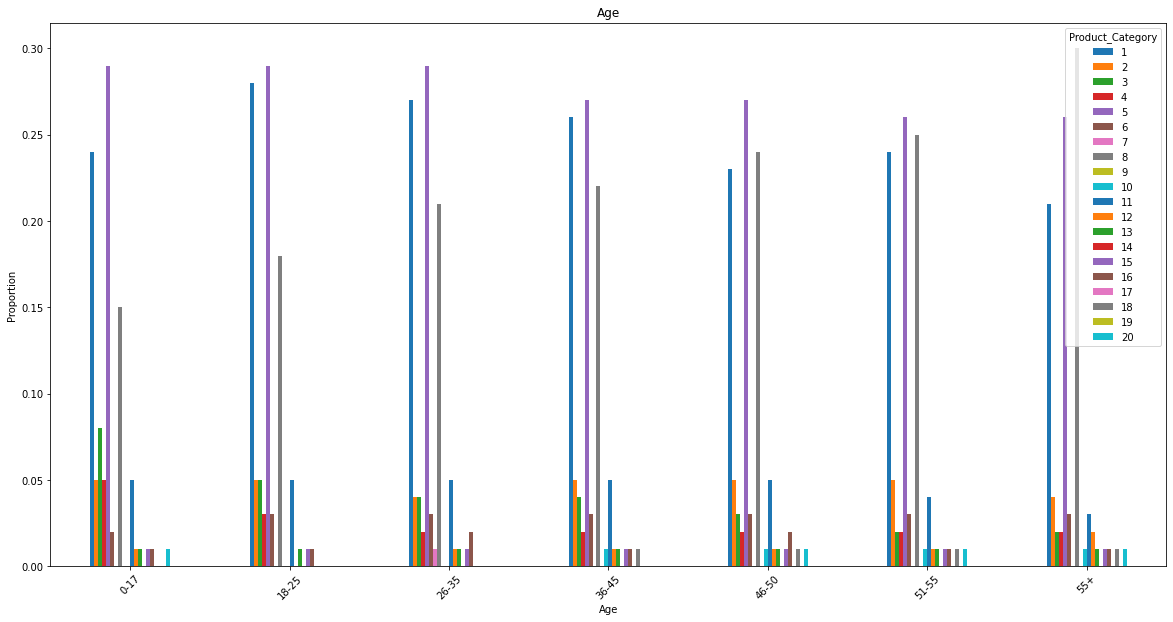

In [169]:
cat_cols= ['Gender', 'Marital_Status','City_Category','Stay_In_Current_City_Years','Age']
for i in cat_cols:
  other= round(pd.crosstab(df[df[i].notnull()][i], df['Product_Category']).div(pd.crosstab(df[df[i].notnull()][i],df['Product_Category']).apply(sum,1),0),2) 
  ax=other.plot(kind='bar', title = i, figsize =(20,10)) 
  ax.set_xlabel(i) 
  ax.set_ylabel('Proportion') 
  plt.xticks (rotation=45) 
  plt.show()


In [170]:
## Tracking the amount spent by male and female
print("Males:: \n")
print("The Total Amount puchases made by males :",df[df['Gender']=="M"]['Purchase'].sum())
print("The Mean of total amount puchases made by males :",round(df[df['Gender']=="M"]['Purchase'].mean(),2))

print("Females:: \n")
print("The Total Amount puchases made by males :",df[df['Gender']=="F"]['Purchase'].sum())
print("The Mean of total amount puchases made by males : ",round(df[df['Gender']=="F"]['Purchase'].mean(),2))

Males:: 

The Total Amount puchases made by males : 3701342147
The Mean of total amount puchases made by males : 9153.02
Females:: 

The Total Amount puchases made by males : 1126664798
The Mean of total amount puchases made by males :  8472.06


### Observations on Categorical plots

1. Total mean of male is more than Female
2. Category 5 is most purchased by male and product category 1 is most purchased by female
3. But Category 1 and 5 are most purchased product category  and being favourite among all other product category
4. Married and unmarried person also preferred to buy product category 5
5. While A and B City Category people prefers to buy produt category 5 and c prefers Product category 1 , the most
6. As Seen for Stay in current years vs Product category , all of them preferred product category the most 


## Probabilites

In [171]:
pd.crosstab(df['Gender'],columns=df['Product_Category'], margins=True)

Product_Category,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,All
Gender,,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,3376,631,33558,56,638,...,1532,1462,623,764,1894,62,382,451,723,132986
M,115547,18206,14207,8114,108972,11556,1832,80367,279,2212,...,2415,4087,900,3936,5969,516,2743,1152,1827,404385
All,140378,23864,20213,11753,150933,14932,2463,113925,335,2850,...,3947,5549,1523,4700,7863,578,3125,1603,2550,537371


In [172]:
pd.crosstab(df['Gender'],columns=df['Product_Category'], margins=True, normalize=True)*100

Product_Category,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,All
Gender,,,,,,,,,,,,,,,,,,,,,
F,4.620830,1.052904,1.117664,0.677186,7.808572,0.628244,0.117424,6.244848,0.010421,0.118726,...,0.285092,0.272065,0.115935,0.142174,0.352457,0.011538,0.071087,0.083927,0.134544,24.747521
M,21.502277,3.387976,2.643797,1.509944,20.278727,2.150470,0.340919,14.955589,0.051919,0.411634,...,0.449410,0.760555,0.167482,0.732455,1.110778,0.096023,0.510448,0.214377,0.339989,75.252479
All,26.123107,4.440880,3.761461,2.187130,28.087299,2.778713,0.458343,21.200437,0.062341,0.530360,...,0.734502,1.032620,0.283417,0.874629,1.463235,0.107561,0.581535,0.298304,0.474532,100.000000


In [173]:
pd.crosstab(df['Gender'],columns=df['Product_Category'], margins=True, normalize="index")

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,0.186719,0.042546,0.045163,0.027364,0.315529,0.025386,0.004745,0.252342,0.000421,0.004797,0.035635,0.011520,0.010994,0.004685,0.005745,0.014242,0.000466,0.002872,0.003391,0.005437
M,0.285735,0.045021,0.035132,0.020065,0.269476,0.028577,0.004530,0.198739,0.000690,0.005470,0.048340,0.005972,0.010107,0.002226,0.009733,0.014761,0.001276,0.006783,0.002849,0.004518
All,0.261231,0.044409,0.037615,0.021871,0.280873,0.027787,0.004583,0.212004,0.000623,0.005304,0.045196,0.007345,0.010326,0.002834,0.008746,0.014632,0.001076,0.005815,0.002983,0.004745


### Population Mean and Population Standard deviation

In [174]:
## Tracking the amount spent by male and female
print("Males:: \n")

male_mean=round(df[df['Gender']=="M"]['Purchase'].mean(),2)
print("The Mean of total amount puchases made by males :",male_mean)
print("The Standard deviation amount puchases made by males :",df[df['Gender']=="M"]['Purchase'].std())

print("Females:: \n")
female_mean= round(df[df['Gender']=="F"]['Purchase'].mean(),2)
print("The Mean of total amount puchases made by females : ",female_mean)
print("The Standard deviation amount puchases made by females :",df[df['Gender']=="F"]['Purchase'].std())

Males:: 

The Mean of total amount puchases made by males : 9153.02
The Standard deviation amount puchases made by males : 4809.692761778849
Females:: 

The Mean of total amount puchases made by females :  8472.06
The Standard deviation amount puchases made by females : 4456.787969134718


In [175]:
## Tracking the amount spent by Married  and Single
print("Married:: \n")

Married_mean=round(df[df['Marital_Status']==1]['Purchase'].mean(),2)
print("The Mean of total amount puchases made by married :",Married_mean)
print("The Standard deviation amount puchases made by married :",df[df['Marital_Status']==1]['Purchase'].std())

print("Single:: \n")
Single_mean= round(df[df['Marital_Status']==0]['Purchase'].mean(),2)
print("The Mean of total amount puchases made by Single : ",female_mean)
print("The Standard deviation amount puchases made by Single :",df[df['Marital_Status']==0]['Purchase'].std())

Married:: 

The Mean of total amount puchases made by married : 8976.64
The Standard deviation amount puchases made by married : 4719.617936141523
Single:: 

The Mean of total amount puchases made by Single :  8472.06
The Standard deviation amount puchases made by Single : 4743.844815795029


# Sample mean Histogram

In [176]:
# Sample mean histogram for purchase made by Male,Female, Married , Single 

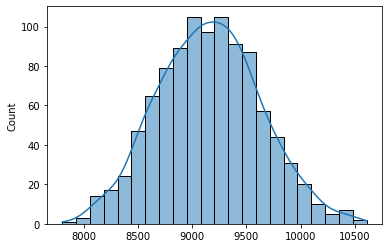

In [177]:
#MALE
sample_size = 100

collect_sample_means_male = []

for person in range(1000):
    sample_mean = df[df['Gender']=="M"]["Purchase"].sample(sample_size).mean()
    collect_sample_means_male.append(sample_mean)

sns.histplot(collect_sample_means_male, kde=True)

# Collecting a random sample mean 
m_male = collect_sample_means_male[0]

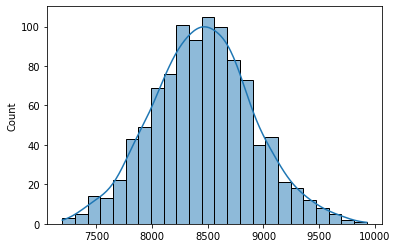

In [178]:
# FEMALE

sample_size = 100
collect_sample_means_female = []
for person in range(1000):
    sample_mean = df[df['Gender']=="F"]["Purchase"].sample(sample_size).mean()
    collect_sample_means_female.append(sample_mean)
sns.histplot(collect_sample_means_female, kde=True)

# Collecting a random sample mean 
m_female=collect_sample_means_female[0]

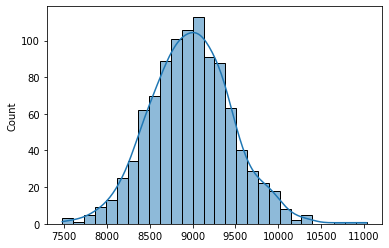

In [179]:
# Married

sample_size = 100
collect_sample_means_married = []
for person in range(1000):
    sample_mean = df[df['Marital_Status']==1]["Purchase"].sample(sample_size).mean()
    collect_sample_means_married.append(sample_mean)
sns.histplot(collect_sample_means_married, kde=True)
m_married=collect_sample_means_married[0]

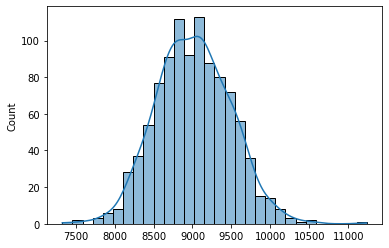

In [180]:
# SINGLE

sample_size = 100
collect_sample_means_single = []
for person in range(1000):
    sample_mean = df[df['Marital_Status']==0]["Purchase"].sample(sample_size).mean()
    collect_sample_means_single.append(sample_mean)
sns.histplot(collect_sample_means_single, kde=True)
m_single=collect_sample_means_single[0]

# Sample Mean Trend 

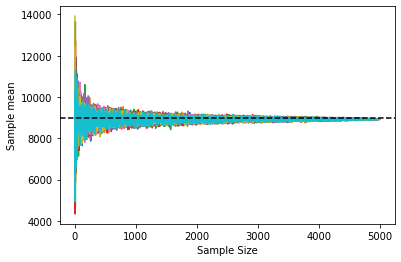

In [181]:
# Getting sample of 5000 from overall purchase
dfs= df.sample(5000)
me_purchase=df['Purchase'].mean()
for person in range(20):
    sample_mean_trend = []
    for num_samples in range(5, len(dfs)):
        sample = dfs["Purchase"].sample(num_samples)
        sample_mean = np.mean(sample)
        sample_mean_trend.append(sample_mean)
    plt.plot(sample_mean_trend)

plt.xlabel("Sample Size")
plt.ylabel("Sample mean")
plt.axhline(y = me_purchase, linestyle = '--', color = 'black')

We Can see , that the mean of samples reaches close to population mean , when sample size increases

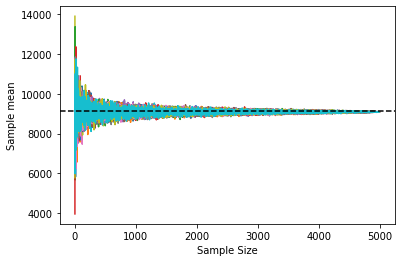

In [182]:
# Getting sample of 5000 for Male Purchase
dfs= df[df["Gender"]=="M"].sample(5000)
me_male=df[df["Gender"]=="M"]["Purchase"].mean()
for person in range(20):
    sample_mean_trend = []
    for num_samples in range(5, len(dfs)):
        sample = dfs["Purchase"].sample(num_samples)
        sample_mean = np.mean(sample)
        sample_mean_trend.append(sample_mean)
    plt.plot(sample_mean_trend)

plt.xlabel("Sample Size")
plt.ylabel("Sample mean")
plt.axhline(y = me_male, linestyle = '--', color = 'black')

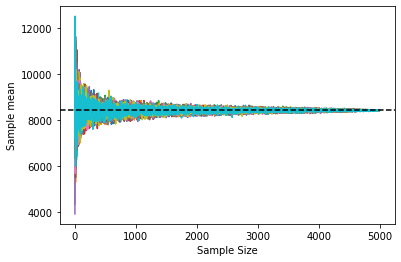

In [183]:
# Getting sample of 5000 for Female Purchas

dfs= df[df["Gender"]=="F"].sample(5000)
me_female=df[df["Gender"]=="F"]["Purchase"].mean()
for person in range(20):
    sample_mean_trend = []
    for num_samples in range(5, len(dfs)):
        sample = dfs["Purchase"].sample(num_samples)
        sample_mean = np.mean(sample)
        sample_mean_trend.append(sample_mean)
    plt.plot(sample_mean_trend)

plt.xlabel("Sample Size")
plt.ylabel("Sample mean")
plt.axhline(y = me_female, linestyle = '--', color = 'black')

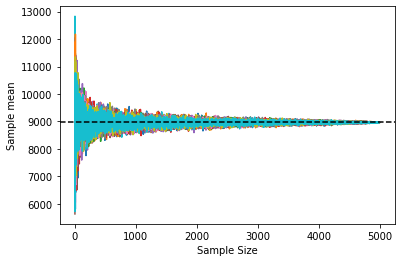

In [184]:
# Getting sample of 5000 for Married Purchase

dfs= df[df["Marital_Status"]==1].sample(5000)
me_married=df[df["Marital_Status"]==1]["Purchase"].mean()
for person in range(20):
    sample_mean_trend = []
    for num_samples in range(5, len(dfs)):
        sample = dfs["Purchase"].sample(num_samples)
        sample_mean = np.mean(sample)
        sample_mean_trend.append(sample_mean)
    plt.plot(sample_mean_trend)

plt.xlabel("Sample Size")
plt.ylabel("Sample mean")
plt.axhline(y = me_married, linestyle = '--', color = 'black')

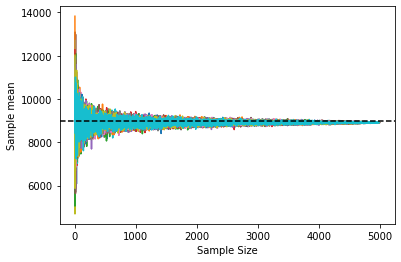

In [185]:
# Getting sample of 5000 for Single Purchase

dfs= df[df["Marital_Status"]==0].sample(5000)
me_single=df[df["Marital_Status"]==0]["Purchase"].mean()
for person in range(20):
    sample_mean_trend = []
    for num_samples in range(5, len(dfs)):
        sample = dfs["Purchase"].sample(num_samples)
        sample_mean = np.mean(sample)
        sample_mean_trend.append(sample_mean)
    plt.plot(sample_mean_trend)

plt.xlabel("Sample Size")
plt.ylabel("Sample mean")
plt.axhline(y = me_single, linestyle = '--', color = 'black')

## Confidence Interval (95 , 99%) - for Gender and Marital status.

In [186]:
# 95% Confidence - Male

Zl= norm.ppf(0.025)
Zr= norm.ppf(0.975)

left = m_male + Zl * male_mean / np.sqrt(sample_size)
right = m_male + Zr * male_mean / np.sqrt(sample_size)
print(f"95% confidence that the population mean of male purchases is in [{np.round(left,2)}, {np.round(right,2)}]")

# 99 % Confidence - Male

z= 2.57

left = m_male - z * male_mean / np.sqrt(sample_size)
right = m_male + z * male_mean / np.sqrt(sample_size)
print(f"99% confidence that the population mean of male purchases is in [{np.round(left,2)}, {np.round(right,2)}]")


# 95% Confidence - Female

Zl= norm.ppf(0.025)
Zr= norm.ppf(0.975)

left = m_female + Zl * female_mean / np.sqrt(sample_size)
right = m_female + Zr * female_mean / np.sqrt(sample_size)
print(f"95% confidence that the population mean of Female purchases is in [{np.round(left,2)}, {np.round(right,2)}]")

# 99 % Confidence - Female

z= 2.576

left = m_female - z * female_mean / np.sqrt(sample_size)
right = m_female + z * female_mean / np.sqrt(sample_size)
print(f"99% confidence that the population mean of Female purchases is in [{np.round(left,2)}, {np.round(right,2)}]")

# 95% Confidence - Married

Zl= norm.ppf(0.025)
Zr= norm.ppf(0.975)

left = m_married + Zl * Married_mean / np.sqrt(sample_size)
right = m_married + Zr * Married_mean / np.sqrt(sample_size)
print(f"95% confidence that the population mean of Married person purchases is in [{np.round(left,2)}, {np.round(right,2)}]")

# 99 % Confidence - Married

z= 2.576

left = m_married - z * Married_mean / np.sqrt(sample_size)
right = m_married + z * Married_mean / np.sqrt(sample_size)
print(f"99% confidence that the population mean of Married person purchases is in [{np.round(left,2)}, {np.round(right,2)}]")


# 95% Confidence - Unmarried

Zl= norm.ppf(0.025)
Zr= norm.ppf(0.975)

left = m_single + Zl * Single_mean / np.sqrt(sample_size)
right = m_married + Zr * Single_mean / np.sqrt(sample_size)
print(f"95% confidence that the population mean of Unmarried person is in [{np.round(left,2)}, {np.round(right,2)}]")

# 99 % Confidence - Unmarried

z= 2.576

left = m_married - z * Single_mean / np.sqrt(sample_size)
right = m_married + z * Single_mean / np.sqrt(sample_size)
print(f"99% confidence that the population mean of Unmarried person purchases is in [{np.round(left,2)}, {np.round(right,2)}]")







95% confidence that the population mean of male purchases is in [8440.23, 12028.15]
99% confidence that the population mean of male purchases is in [7881.86, 12586.52]
95% confidence that the population mean of Female purchases is in [6238.67, 9559.65]
99% confidence that the population mean of Female purchases is in [5716.76, 10081.56]
95% confidence that the population mean of Married person purchases is in [6859.22, 10378.0]
99% confidence that the population mean of Married person purchases is in [6306.23, 10930.99]
95% confidence that the population mean of Unmarried person is in [8227.67, 10380.61]
99% confidence that the population mean of Unmarried person purchases is in [6302.8, 10934.42]


##Observations

There is considerable overlap for Male and Female , and Married and unmarried person. So there is no much difference in their mean significance.


# Business Insights

1. There are more males than female in dataset
2. More records of  Married person than singles present in dataset
3. Product Category 5 is the most purchased product and least purchases category is 9
4. There are more number of 4th category occupation present in dataset and 8th category occupation is least.
5. One year of stay in current city category is more in dataset
6. Age Category - 26 to 35 has purchased more number of product and the count is high in dataset
7. There are outliers present in purchase amount greater than 20000
8. Mean Purchases made by male is 9437 and by female is 5092
9. Mean purchases made by married person is 9261 and by single person is 8734

# Recommendations


1. As checked in dataset, we infer , Married person purchase more than single , and there is a difference of 1000 in mean purchase, So , product category liked by single person , can be sell more to attract singles
2. Least purchased product category 9 , can be marketed more to boost up the sales
3. More purchases made by 26-35 , and hence products related that category can be sold 
4. Since the purchases by City Category A is least, more specific city offers can be given to boost up the sales
5. Product category 1 is most brought by males, so more products can be released with respect to that category.
6. Second and third most purchased category is 1 and 8. More offers can be given on that product category to increase the sales , since it might also be a essential day-to-day used product